In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-dataset/zomato.csv


## 1. Importing important libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Importing the Data

In [3]:
df = pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.drop(columns=["url","address","phone","menu_item"],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

## 3. Cleaning the data 

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                            7757
votes                              0
location                          21
rest_type                        227
dish_liked                     28019
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df["rate"]

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51645, dtype: object

Now we can see there are many values that are null in columns rate,location,rest_type,dish_liked

 df["rate"] column contain NAN values and is given by number/5 so we need to seperate it and convert it into float

In [11]:
def rate_clean(rate):
    if(rate=="NEW" or rate=="-"):
        return np.nan
    else:
        rate = str(rate).split("/")[0]
        return float(rate)
df["rate"] = df["rate"].apply(rate_clean)

In [12]:
df["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

## 4. No of unique values

4.1 No of unique values in location

In [13]:
df["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [14]:
df["approx_cost(for two people)"]

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51645, dtype: object

In [15]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str)

In [16]:
df["approx_cost(for two people)"]

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51645, dtype: object

In [17]:
# replace NAN with mean value
df['rate'].fillna(0)
df['rate'] = pd.to_numeric(df["rate"], downcast="float")

df['rate'].replace(to_replace = 0, value = df['rate'].mean(), inplace=True)

#booking table rating

table_booking_rating_avg = df[df['book_table'] == 'Yes']['rate'].mean()
table_booking_rating_avg = round(table_booking_rating_avg,2)
print('Rating of Table Booking Orders is =',table_booking_rating_avg,'\n')
# non booking ratings

no_booking_rating_avg = df[df['book_table'] == 'No']['rate'].mean()
no_booking_rating_avg = round(no_booking_rating_avg,2)
print('Rating of No Table Booking Orders is =',no_booking_rating_avg)

Rating of Table Booking Orders is = 4.14 

Rating of No Table Booking Orders is = 3.62


In [18]:
df.isnull().sum()
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
dtype: int64

## 5. Now Visualizing the Data

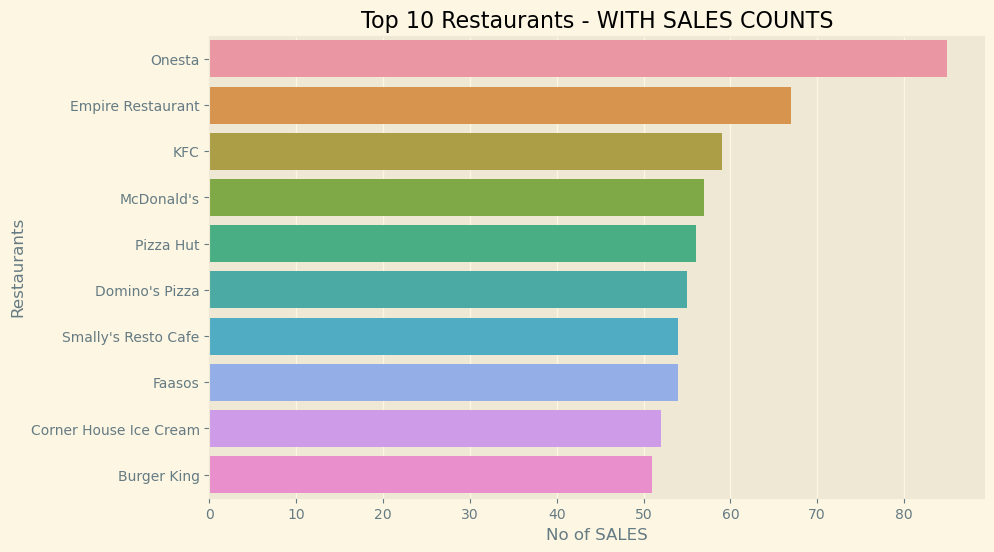

In [20]:
## FINDING TOP 10 Restaurants with Rating on basis of rating
plt.style.use("Solarize_Light2")
x = df["name"].value_counts().sort_values(ascending=False)[:10]
y = x.index 
plt.figure(figsize=(10,6))
sns.barplot(x=x,y=y)
plt.xlabel("No of SALES")
plt.ylabel("Restaurants")
plt.title("Top 10 Restaurants - WITH SALES COUNTS",color="black");

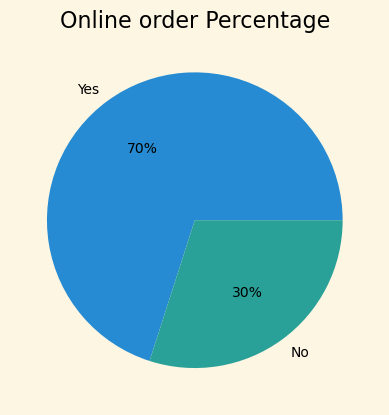

In [21]:
## Pie plots with counts of online order

plt.style.use("Solarize_Light2")
x = df["online_order"].value_counts()
y = x.index
plt.pie(x=x, labels=y, autopct='%.0f%%')
plt.title("Online order Percentage",color="black");


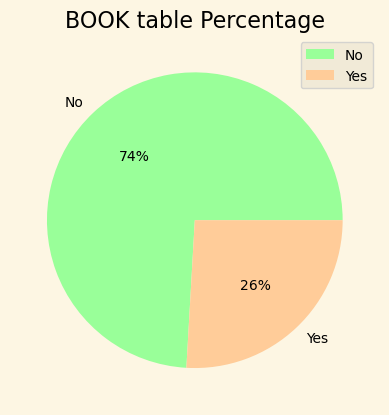

In [22]:
## Pie plots with counts of book_table
plt.style.use("Solarize_Light2")
x = df["book_table"].value_counts()
y = x.index
colors = ['#99ff99','#ffcc99']
plt.pie(x=x, labels=y, autopct='%.0f%%',colors=colors)
plt.title("BOOK table Percentage",color="black")
plt.legend(y, loc="best")

## Top 10 liked dishes

<Axes: xlabel='dish_liked'>

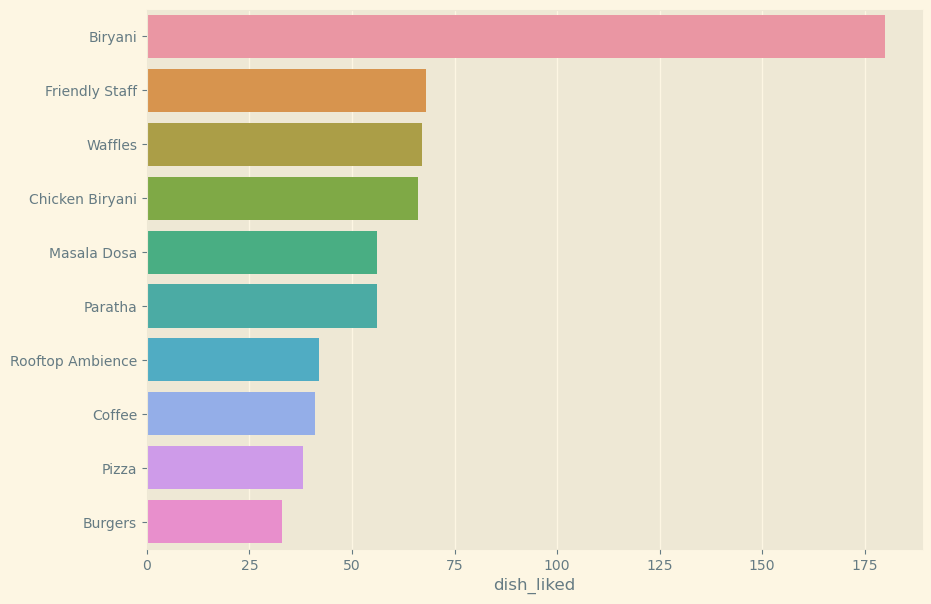

In [23]:
x = df["dish_liked"].value_counts()[:10].sort_values(ascending=False)
y = x.index
plt.figure(figsize=(10,7))
sns.barplot(x=x,y=y)

# Top 10 Cities

In [24]:
plt.style.use("Solarize_Light2")
x=df["listed_in(city)"].value_counts()[:10].sort_values()
y=x.index
fig=px.bar(x=x,y=y,labels={"y":"Cities","x":"Number of Cities"},title="Cities")
fig.show()

## Top 10 locations

<Axes: xlabel='location'>

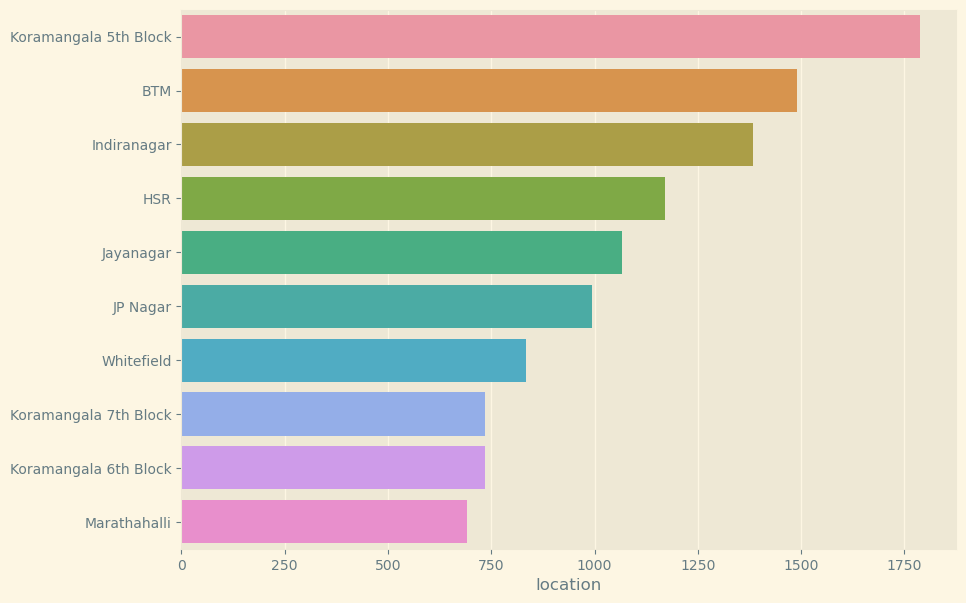

In [25]:
plt.style.use("Solarize_Light2")
x = df["location"].value_counts()[:10].sort_values(ascending = False)
y = x.index
plt.figure(figsize=(10,7))
sns.barplot(x=x,y=y)

# Locations with least Value

<Axes: xlabel='location'>

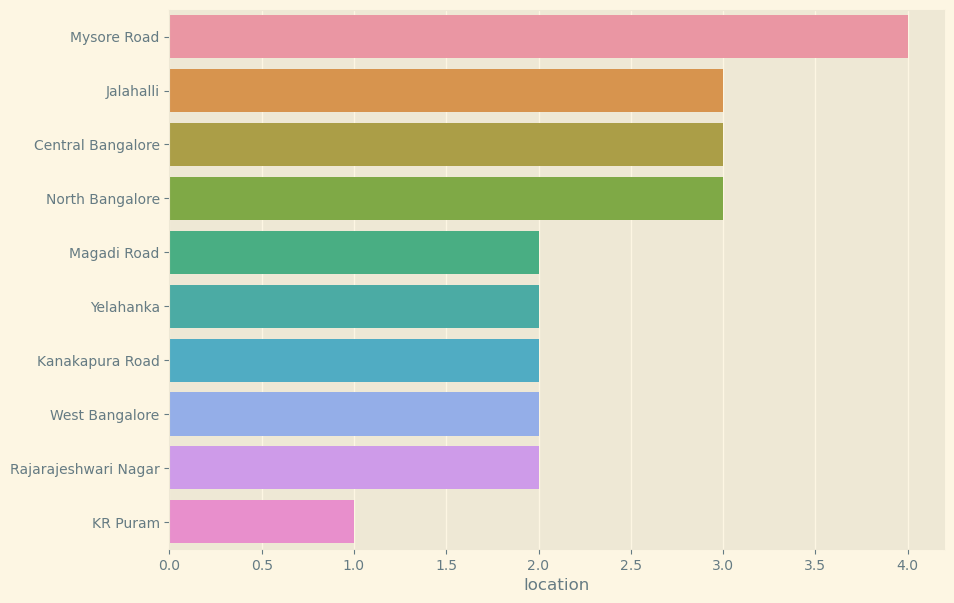

In [26]:
plt.style.use("Solarize_Light2")
x = df["location"].value_counts()[-10:].sort_values(ascending = False)
y = x.index
plt.figure(figsize=(10,7))
sns.barplot(x=x,y=y)

## Top 10 rest type

<Axes: xlabel='rest_type'>

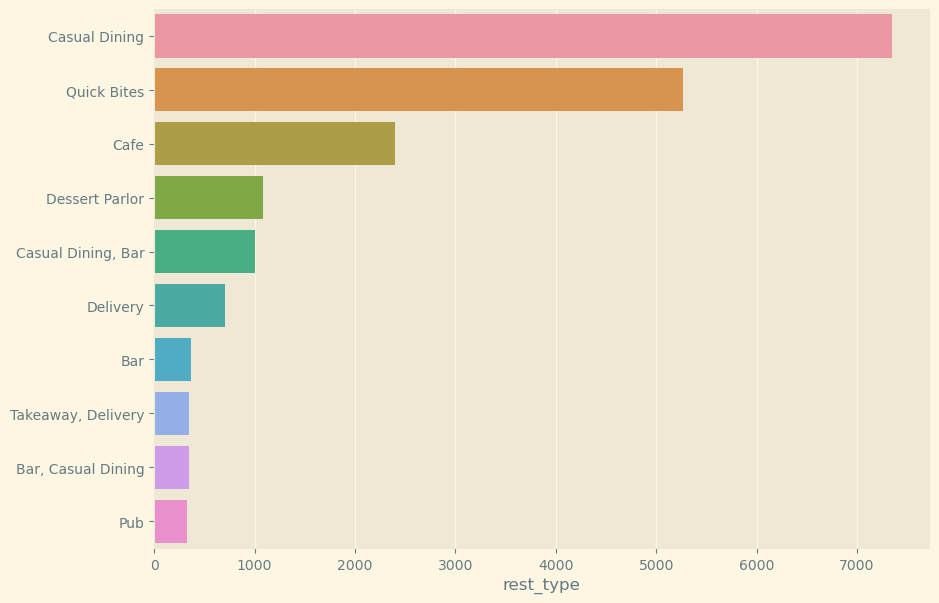

In [27]:
plt.style.use("Solarize_Light2")
x = df["rest_type"].value_counts()[:10].sort_values(ascending = False)
y = x.index
plt.figure(figsize=(10,7))
sns.barplot(x=x,y=y)